In [1]:
import json
import urllib.request
import pandas as pd
import numpy as np

In [2]:
#creating a vector containing the columns names of a DataFrame
names = ['ratingMPAA', 'budgetData', 'ratingData', 
         'is3D', 'posterURL', 'webURL', 'filmLength', 
         'ratingAgeLimits', 'videoURL', 'genre', 'nameEN', 'hasSeance', 'isHasSimilarFilms', 
         'filmID', 'reviewsCount', 'country', 'isIMAX', 'isHasSequelsAndPrequelsFilms', 'rentData', 
         ]
print(names)

['ratingMPAA', 'budgetData', 'ratingData', 'is3D', 'posterURL', 'webURL', 'filmLength', 'ratingAgeLimits', 'videoURL', 'genre', 'nameEN', 'hasSeance', 'isHasSimilarFilms', 'filmID', 'reviewsCount', 'country', 'isIMAX', 'isHasSequelsAndPrequelsFilms', 'rentData']


In [3]:
#Write a function to get the data about the Film by ID
def getFilm(id):
    """
    Input: kinopoisk ID of the Movie
    Output: JSON object
    """
    URL = 'http://api.kinopoisk.cf/getFilm?filmID=%s'%id
    result = urllib.request.urlopen(URL)
    encoding = 'utf-8'
    json_text = result.read().decode(encoding)
    if json_text == 'null':
        return None
    else:
        return json.loads(json_text)

In [4]:
#Write a function that creates a DataFrame based on JSON object
def totalDataSet(json_file, filmId):
    """
    Input: JSON file containing an information about the Film, kinopoisk ID of the Movie
    Output: Pandas DataFrame    
    """
    totalFrame = pd.DataFrame(index=[filmId], columns=['FilmID'], data=[filmId])
    for name in names:
        if name not in json_file.keys():
            if name in ['budgetData', 'ratingData', 'rentData']:
                data = pd.DataFrame(["NaN"], index=[filmId])
                totalFrame = pd.concat([totalFrame, data], axis=1)
            else:
                data = pd.DataFrame(["NaN"], index=[filmId], columns=[name])
                totalFrame = pd.concat([totalFrame, data], axis=1)
        elif name in ['budgetData', 'ratingData', 'rentData', ]:
            data = pd.DataFrame(json_file[name], index=[filmId])
            totalFrame = pd.concat([totalFrame, data], axis=1)
        else:
            data = pd.DataFrame(json_file[name], index=[filmId], columns=[name])
            totalFrame = pd.concat([totalFrame, data], axis=1)
    return totalFrame

In [41]:
def getFilmsbyRange(startId):
    """
    Getting data for the films with ID between [startId, endId) and returning a tuple (df, filename)
    Input: startId, endId
    Output: file containing the dataframe
    """
    endId = startId + 100
    filename = "./data/moviesID%s_%s.pkl"%(startId, endId)
    frame_to_save = pd.DataFrame(index=[0], columns=['FilmID'], data=[None])
    for i in range(startId, endId):
        json_film = getFilm(i)
        #print(json_film)
        if json_film is None:
            continue
        df_film = totalDataSet(json_film, i)
        if df_film is not None:
            if 0 in df_film.columns:
                df_film = df_film.drop(0, 1)
            df_film.drop_duplicates(keep=False)
        frame_to_save = frame_to_save.append(df_film)
    #print(frame_to_save)
    print("OK")
    return (frame_to_save, filename)

In [6]:
def saveDFToFile(data):
    """
    Input: tuple (df, filename), where df is a dataframe
    Output: file containing the df
    """
    filename = data[1]
    dataframe = data[0]
    import pickle
    file = open(filename, 'wb')
    pickle.dump(dataframe, file)
    file.close()
    print("Everything is fine. Data is saved.")

In [5]:
def getResfromPickle(filename):
    """
    Simply opens a file and loads a dataframe from it
    Input: filename
    Output: dataframe
    """
    import pickle
    file = open(filename, 'rb')
    resultDF = pickle.load(file)
    file.close()
    return resultDF

In [37]:
#example usage. Getting films from 1000 to 2000
#filmData = getFilmsbyRange(41000)

In [39]:
#saving data
#saveDFToFile(filmData)

In [38]:
#loading data from a file
#getResfromPickle("./moviesID41000_42000.pkl")

# Using multiprocessing

In [61]:
#from multiprocessing import Pool
#from multiprocessing.dummy import Pool as ThreadPool

#pool = ThreadPool(8)

In [60]:
#a = [100*i for i in range(32,40)]
#a

In [58]:
#%%time
#data = pool.map(getFilmsbyRange, a)

In [59]:
#for i in data:
#    saveDFToFile(i)

In [132]:
#getResfromPickle("./moviesID439000_440000.pkl").head()

# Creating a final dataframe

In [2]:
import os

In [3]:
files = os.listdir("./data/")

In [7]:
#os.chdir("./data/")
total_frame = pd.DataFrame(index=[0], columns=['FilmID'], data=[None])
for file in files:
    total_frame = total_frame.append(getResfromPickle(file))

# Preprocessing data

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [9]:
#deleting unnecesary data
df = total_frame[total_frame.index != 0]

In [10]:
def fromStrToNum(string):
    return int(string.replace(" ", ""))

In [11]:
#исправляем данные о бюджете, кассовых сборах там, где тип данных object
moneyData = ['budget', 'grossRU', 'grossUSA', 'grossWorld']

def repairMoney(moneyData = moneyData):
    global df
    for colname in moneyData:
        df[colname] = df[df[colname].isnull() == False][colname].apply(fromStrToNum)

In [12]:
repairMoney()

c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
df['ratingIMDb'] = df['ratingIMDb'].astype(float)

c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
df.dtypes.head()

Distributors           object
FilmID                float64
budget                float64
country                object
distributorRelease     object
dtype: object

In [168]:
#количество фильмов по странам
table = df.groupby('country').size()
table = table.sort(inplace = False, ascending=False)

c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


In [187]:
mdata = pd.DataFrame(table, columns=['value'])
mdata['country'] = mdata.index
mdata.index = list(range(len(mdata.index)))

In [193]:
mdata['country'].unique

<bound method IndexOpsMixin.unique of 0                                  США
1                  Великобритания, США
2                       Великобритания
3                        США, Германия
4                               Канада
5                             Германия
6                  США, Великобритания
7                          США, Канада
8                          Канада, США
9                        Германия, США
10                        Франция, США
11                             Франция
12                              Швеция
13                        США, Франция
14                      США, Австралия
15                              Италия
16                              Япония
17                         США, Япония
18                     Италия, Франция
19       США, Германия, Великобритания
20             Великобритания, Франция
21                         Италия, США
22                           Австралия
23       Великобритания, Германия, США
24                      Ав

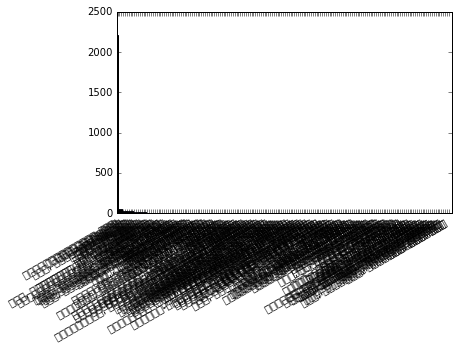

In [192]:
fig = plt.figure()
width = .525
ind = np.arange(len(mdata['value']))
plt.bar(ind, mdata['value'], width=width)
plt.xticks(ind + width/2, mdata['country'])

fig.autofmt_xdate()

In [100]:
table.keys()[1:10]

Index(['США, Новая Зеландия', 'Бразилия, Франция', 'Италия, США, Испания',
       'Польша, Франция, Великобритания', 'Япония, Франция',
       'Франция, Германия (ФРГ), Швеция', 'США, Гонконг, Великобритания',
       'Япония, Тайвань', 'Великобритания, Индия'],
      dtype='object', name='country')

In [144]:
country_names = ['US, New Zealand', 'Brazil, France', 'Italy, US, Spain', 
                'Poland, France, GB','Japan, France', 'France, Germany, Sweden',
                'US, GB', 'Japan, Taivan', 'GB, Hindi']
values = table.values[1:10]

In [146]:
mdata = pd.DataFrame({'country': country_names, 'value': values})

ValueError: could not convert string to float: 'US, New Zealand'

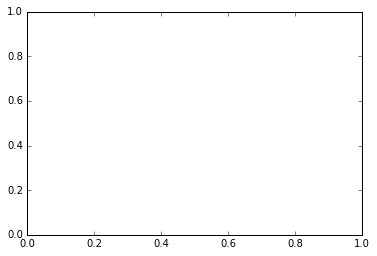

In [153]:
plt.bar(mdata['country'], mdata['value'])

In [140]:
mdata

,0
0,"US, New Zealand"
1,"Brazil, France"
2,"Italy, US, Spain"
3,"Poland, France, GB"
4,"Japan, France"
5,"France, Germany, Sweden"
6,"US, GB"
7,"Japan, Taivan"
8,"GB, Hindi"


(array([   1.,    1.,    2.,    7.,    7.,    1.,    7.,    8.,   17.,
          13.,   29.,   52.,   76.,   68.,  132.,  189.,  141.,  266.,
         339.,  213.,  293.,  161.,  265.,  172.,   96.,  134.,   74.,
          20.,    9.,    2.]),
 array([ 1.4       ,  1.66333333,  1.92666667,  2.19      ,  2.45333333,
         2.71666667,  2.98      ,  3.24333333,  3.50666667,  3.77      ,
         4.03333333,  4.29666667,  4.56      ,  4.82333333,  5.08666667,
         5.35      ,  5.61333333,  5.87666667,  6.14      ,  6.40333333,
         6.66666667,  6.93      ,  7.19333333,  7.45666667,  7.72      ,
         7.98333333,  8.24666667,  8.51      ,  8.77333333,  9.03666667,
         9.3       ]),
 <a list of 30 Patch objects>)

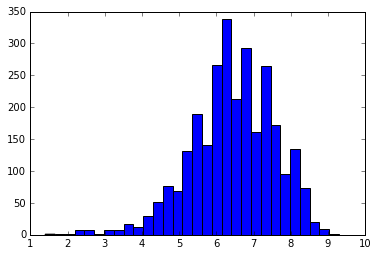

In [39]:
plt.hist(df['ratingIMDb'].dropna().astype(float), bins=30)

In [118]:
df[df['budget'] > 4000000]

,Distributors,FilmID,budget,country,distributorRelease,filmID,filmLength,genre,grossRU,grossUSA,...,ratingFilmCriticsVoteCount,ratingGoodReview,ratingGoodReviewVoteCount,ratingIMDb,ratingIMDbVoteCount,ratingMPAA,ratingVoteCount,reviewsCount,videoURL,webURL
1047,Lizard Cinema,1047,12000000,"Германия, Канада, США",NaN,1047,1:30,"ужасы, боевик, триллер",560000,10249719,...,57,25%,3,2.0,30 996,R,3 743,32,http://kp.cdn.yandex.net/trailers/1047/kinopoi...,http://www.kinopoisk.ru/film/1047/
1048,Каскад,1048,70000000,"США, Германия",NaN,1048,1:31,"фантастика, боевик, триллер",NaN,14307963,...,NaN,75%,2,3.6,16 337,R,2 308,5,NaN,http://www.kinopoisk.ru/film/1048/
1049,Пирамида,1049,17000000,США,NaN,1049,1:40,"фантастика, боевик, триллер",NaN,NaN,...,11,81.3%,6,5.3,10 739,R,4 268,8,NaN,http://www.kinopoisk.ru/film/1049/
1054,NaN,1054,20000000,"США, Великобритания, Франция",CP-Digital,1054,1:40,"триллер, драма, мелодрама",NaN,5095038,...,143,87%,23,6.1,28 464,R,2 840,32,NaN,http://www.kinopoisk.ru/film/1054/
1059,NaN,1059,36000000,США,Premier Digital,1059,2:35,"драма, история",NaN,44229441,...,61,90%,4,7.2,53 737,R,4 034,5,NaN,http://www.kinopoisk.ru/film/1059/
1060,NaN,1060,73000000,США,Юниверсал Пикчерс Рус,1060,2:03,"фантастика, боевик, приключения",NaN,229086679,...,64,75.6%,25,6.5,255 340,PG-13,32 294,42,http://kp.cdn.yandex.net/trailers/1060/kinopoi...,http://www.kinopoisk.ru/film/1060/
1065,NaN,1065,34000000,США,Гемини-Фильм,1065,1:59,"драма, криминал",NaN,50282766,...,35,78.7%,52,7.3,163 833,R,20 504,78,NaN,http://www.kinopoisk.ru/film/1065/
1070,NaN,1070,40000000,США,NaN,1070,2:18,"драма, комедия, музыка",NaN,17860280,...,13,100%,1,6.2,4 017,R,78,1,NaN,http://www.kinopoisk.ru/film/1070/
1073,NaN,1073,23000000,США,Мост-Видео,1073,1:55,"триллер, драма, мелодрама",NaN,41292551,...,18,60%,2,6.0,22 122,R,1 995,6,NaN,http://www.kinopoisk.ru/film/1073/
1081,West,1081,30000000,США,West Video,1081,1:35,"фантастика, триллер, драма",262387,6285176,...,93,76.9%,8,6.2,19 461,PG-13,4 951,14,http://kp.cdn.yandex.net/trailers/1081/kinopoi...,http://www.kinopoisk.ru/film/1081/


In [223]:
total_frame.to_csv("../totalFrame.csv")

In [122]:
def RussiaInCountry(row):
    if "Россия" in row:
        return True
    else:
        return False

In [124]:
df['isRussian'] = df['country'].apply(RussiaInCountry)

c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [126]:
df[df['isRussian'] == True]

,Distributors,FilmID,budget,country,distributorRelease,filmID,filmLength,genre,grossRU,grossUSA,...,ratingGoodReview,ratingGoodReviewVoteCount,ratingIMDb,ratingIMDbVoteCount,ratingMPAA,ratingVoteCount,reviewsCount,videoURL,webURL,isRussian
1552,NaN,1552,10000000,"Великобритания, Германия, Россия",Кармен Видео,1552,2:07,"триллер, драма, мелодрама",41000,NaN,...,66.7%,2,6.8,925,NaN,580,5,NaN,http://www.kinopoisk.ru/film/1552/,True


In [144]:
#Фильмы, для которых признаки 'budget' и 'grossUSA' не пустые
df_prep = df[(df['budget'].isnull() == False) & (df['grossUSA'].isnull() == False) == True]

In [161]:
df_prep.head()

,Distributors,FilmID,budget,country,distributorRelease,filmID,filmLength,genre,grossRU,grossUSA,...,ratingGoodReview,ratingGoodReviewVoteCount,ratingIMDb,ratingIMDbVoteCount,ratingMPAA,ratingVoteCount,reviewsCount,videoURL,webURL,isRussian
1006,NaN,1006,1800000,США,NaN,1006,1:39,"триллер, детектив",NaN,4500000,...,91.7%,10,7.5,22 794,NaN,2 129,12,NaN,http://www.kinopoisk.ru/film/1006/,False
1033,NaN,1033,225000,США,Светла,1033,1:27,"мюзикл, мелодрама, комедия",NaN,2850000,...,NaN,NaN,7.0,2 173,NaN,103,NaN,NaN,http://www.kinopoisk.ru/film/1033/,False
1037,NaN,1037,200000,США,Светла,1037,1:06,"мюзикл, драма, мелодрама",NaN,2000000,...,100%,4,6.5,4 037,NaN,243,5,NaN,http://www.kinopoisk.ru/film/1037/,False
1047,Lizard Cinema,1047,12000000,"Германия, Канада, США",NaN,1047,1:30,"ужасы, боевик, триллер",560000,10249719,...,25%,3,2.0,30 996,R,3 743,32,http://kp.cdn.yandex.net/trailers/1047/kinopoi...,http://www.kinopoisk.ru/film/1047/,False
1048,Каскад,1048,70000000,"США, Германия",NaN,1048,1:31,"фантастика, боевик, триллер",NaN,14307963,...,75%,2,3.6,16 337,R,2 308,5,NaN,http://www.kinopoisk.ru/film/1048/,False


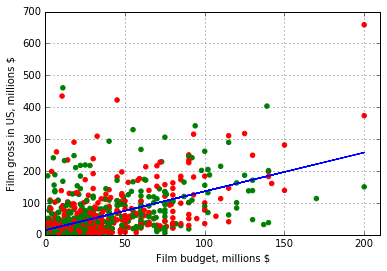

In [160]:
#исследуем связь между признаками budget и grossUSA
a,b = np.polyfit(df_prep['budget']/1000000, df_prep['grossUSA']/1000000, 1)

plt.scatter(df_prep['budget']/1000000, df_prep['grossUSA']/1000000, color=['red','green'])
plt.xlabel("Film budget, millions $")
plt.ylabel("Film gross in US, millions $")
plt.xlim(0,210)
plt.ylim(0,700)
plt.grid()
plt.plot(df_prep['budget']/1000000, a*df_prep['budget']/1000000 + b)

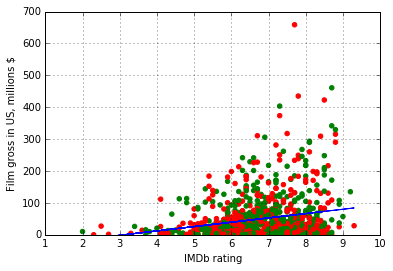

In [168]:
a,b = np.polyfit(df_prep['ratingIMDb'].astype(float), df_prep['grossUSA']/1000000, 1)

plt.scatter(df_prep['ratingIMDb'].astype(float), df_prep['grossUSA']/1000000, color=['red','green'])
plt.xlabel("IMDb rating")
plt.ylabel("Film gross in US, millions $")
plt.xlim(1,10)
plt.ylim(0,700)
plt.grid()
plt.plot(df_prep['ratingIMDb'].astype(float), a*df_prep['ratingIMDb'].astype(float) + b)